# Example 2 of the "The GMT/MATLAB Toolbox" Wessel P & J. Luis. 
DOI 10.1002/2016GC006723

# Profiling

This example is more ambitious and imports a relief grid for an area off Japan as well as a line data set reflecting the location of the Japan Trench. We wish to create profiles normal to the trench every 25 km, with each profile being 300 km long and sampling the grid every one km along the profiles. Finally, these profiles, which all have distance = 0 at the trench axis, are stacked and a median profile is computed.

In [5]:
using GMT
# Read in relief grid and Japan trench location
G = gmt("read -Tg JP.nc");
T = gmt("read -Td JP.txt");

Take gradient in N45E direction to be used for illumination

In [6]:
intens = gmt("grdgradient -Nt0.8 -A90", G);

Sample grid along profiles normal to the trench

In [8]:
profiles, stack = gmt("grdtrack -G -C300k/1k/25k -Sm+s+a", T, G);

Evaluate an asymmetrical color palette with hinge at sealevel

In [9]:
C = gmt("makecpt -Cgeo -T-8000/2000");

Make the GMT plot

In [10]:
P = gmt("grdimage -R141/147/35/42 -JM6i -P -Baf -BWSne -I -K -C --FORMAT_GEO_MAP=dddF", G, intens, C);
P = gmt("pscoast -R -J -O -K -W0.25p -Dh -LjTR+w200k+u+f+c38:30N+o0.5i/0.2i -F+gwhite+p0.5p");

Use first and last point of each profile and create a polygon of the area

In [13]:
A = gmt("convert -Ef -T", profiles);
B = gmt("convert -El -T -Is", profiles); 
# Join the two segments
area = [A[1].data; B[1].data];
P = gmt("psxy -R -J -O -K -Ggreen@85", area);
P = gmt("psxy -R -J -O -K -W2p+v0.3c+gred+p0.25p+bc+ec", T);
P = gmt("psxy -R -J -O -K -W0.5p,red+v0.25c+p0.25p+bt+et", profiles);
P = gmt("psscale -R -J -O -DjBL+w3i/0.1i+h+o0.3i/0.4i -C -W0.001 -F+gwhite+p0.5p+i0.25p -Bxaf -By+l\"km\"", C);

Convert plot to a PNG and display it

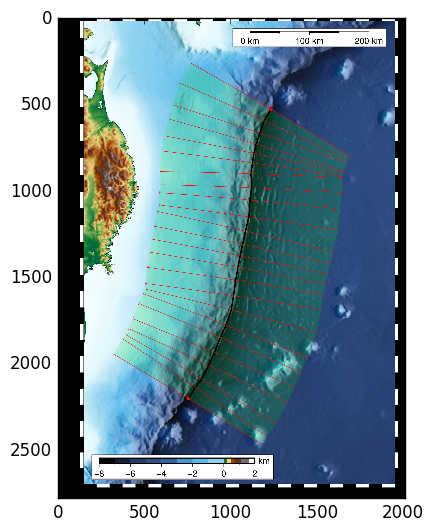

PyObject <matplotlib.image.AxesImage object at 0x0000000033204320>

In [15]:
using PyPlot
I = gmt("psconvert -TG -P -E300 -A", P);
imshow(I.image)

Show the stacked relief profiles across the trench

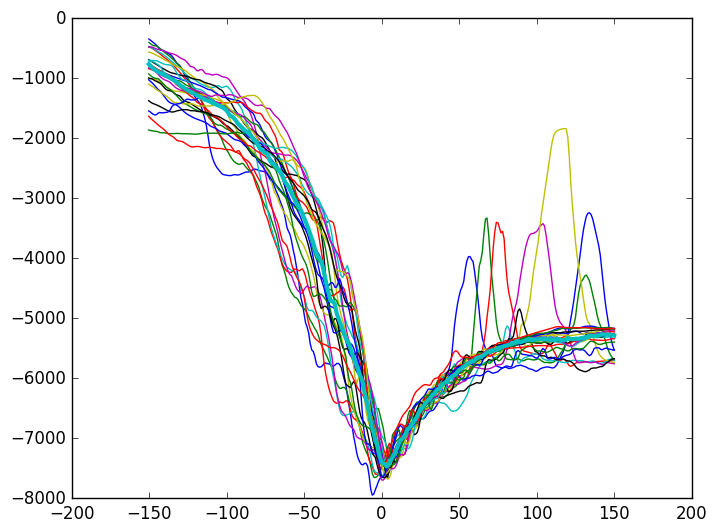

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000002C8B3C50>

In [20]:
for k=1:length(profiles)
    plot(profiles[k].data[:,3], profiles[k].data[:,5])
end
plot(stack[1].data[:,1], stack[1].data[:,2], linewidth=3)